# 3. Interpolation (Dr. Shanbhag)

The population in the US is given in the following table:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline

In [4]:
num_pts = 9
time = np.linspace(1900, 1980, num_pts)
pop = np.array([76212168, 92228496, 106021537, 123202624, 132164569, 
                151325798, 179323175, 203302031, 226542199])

There is a unique polynomial of degree $8$ that interpolates these $9$ data points, but that polynomial can be represented in many different ways. Consider the following possible sets of basis functions:
1. $\phi_j(t) = t^{j-1}$
2. $\phi_j(t) = (t-1900)^{j-1}$
3. $\phi_j(t) = (t-1940)^{j-1}$
4. $\phi_j(t) = \frac{t-1940}{40}^{j-1}$
where $j = 1,...,9$.

In [5]:
def basis(t,j, basis_idx):
    if basis_idx == 1:
        return t**(j-1)
    if basis_idx == 2:
        return (t-1900)**(j-1)
    if basis_idx == 3:
        return (t-1940)**(j-1)
    if basis_idx == 4:
        return ((t-1940)/40.0)**(j-1)

* For the four sets of basis functions generate the corresopnding Vandermonde matrix, and compute the corresponding condition number (use of a library routine is fine). Explain your observations

In [45]:
num_basis = 4
cond_nums = np.zeros(num_basis)

for basis_idx in xrange(num_basis):
    V = np.zeros((num_pts, num_pts))
    for i in xrange(num_pts):
        for j in xrange(num_pts): 
            V[i,j] = basis(time[i], j+1, basis_idx+1)
    cond_nums[basis_idx] = np.linalg.cond(V)

print "The condition numbers are:"
print cond_nums

The condition numbers are:
[  1.31577874e+37   6.54074835e+15   9.31553605e+12   1.60544370e+03]


* Using the best-conditioned basis, compute the polynomial interpolant.

In [33]:
basis_idx = 4
V = np.zeros((num_pts, num_pts))
for i in xrange(num_pts):
    for j in xrange(num_pts): 
        V[i,j] = basis(time[i], j+1, basis_idx)

coeffs = np.linalg.solve(V, pop)
print "The coefficients of the polynomial interpolant are:"
print coeffs

def my_poly_inter(time, coeffs, basis_idx):
    y = 0
    for j in xrange(len(coeffs)):
        y += coeffs[j]*basis(time, j+1, basis_idx)
    return y

The coefficients of the polynomial interpolant are:
[  1.32164569e+08   4.61307656e+07   1.02716315e+08   1.82527130e+08
  -3.74614715e+08  -3.42668456e+08   6.06291250e+08   1.89175576e+08
  -3.15180235e+08]


* Use Hermite cubic interpolation (again, use of a library routine is fine) to interpolate the data. Plot the data and both the interpolants.

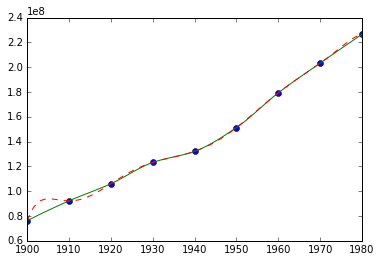

In [37]:
my_cubic_hermite = interpolate.PchipInterpolator(time, pop)
plt.plot(time, pop, 'o')
t = np.linspace(1900, 1980, 100)
plt.plot(t, my_cubic_hermite(t))
plt.plot(t, my_poly_inter(t, coeffs, 4), '--')

* Extrapolate the population to $1990$ using the two interpolants. How do they compare with the true value of $248,709,873$ according to the $1990$ census.

In [44]:
t = 1990
true_pop = 248709873
poly_inter_approx = my_poly_inter(t, coeffs, 4)
cubic_hermite_approx = my_cubic_hermite(t)
print "According to the polynomial interpolation, the population at %i is %g" %(t, poly_inter_approx)
print "According to the cubic hermite interpolation, the population at %i is %g" %(t, cubic_hermite_approx)
print "Since the exact solution is %g, the relative errors are:" %true_pop
print "Polynomial interpolation: %f" %np.fabs((poly_inter_approx-true_pop)/true_pop)
print "Cubic Hermite interpolation: %f" %np.fabs((cubic_hermite_approx-true_pop)/true_pop)


According to the polynomial interpolation, the population at 1990 is 8.27491e+07
According to the cubic hermite interpolation, the population at 1990 is 2.49032e+08
Since the exact solution is 2.4871e+08, the relative errors are:
Polynomial interpolation: 0.667286
Cubic Hermite interpolation: 0.001296
